<hr style="border:1px solid gray"> </hr>

# Parameter homotopies

*Documentation*: https://www.juliahomotopycontinuation.org/HomotopyContinuation.jl/stable/solve/

Consider the situation in which one has to solve a specific instance of a *parametrized* family of polynomial systems


$$
P = \{F(x,p)  \mid p \in \mathbb{C}^m\}.
$$

For instance, let $P = \{F(x,y,a,b) \mid (a,b)\in\mathbb{C}^2\}$ where

$$F(x,y,a,b) = \begin{bmatrix} x^2-a \\ xy-a+b \end{bmatrix}.$$



In [1]:
using HomotopyContinuation
@var x y a b
f = [x^2 - a, x * y - a + b]
F = System(f, variables = [x;y], parameters = [a;b])

System of length 2
 2 variables: x, y
 2 parameters: a, b

 -a + x^2
 -a + b + x*y

For solving systems with parameters one should **first solve the system for a random set of complex parameters $q$**. 

After this one should track the solutions towards the parameters $p$ one is interested in by using the *parameter homotopy*

$$H(x,t) := F(x, (1-t)p + tq)$$

Suppose we are interested in solving the system given by $(a,b)=(3,5)$. Then, following the rule above we solve it as follows.

In [2]:
random_complex_parameters = randn(ComplexF64,2)

S0 = solve(F; target_parameters = random_complex_parameters)

Tracking 2 paths... 100%|███████████████████████████████| Time: 0:00:07
  # paths tracked:                  2
  # non-singular solutions (real):  2 (0)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         2 (0)


Result with 2 solutions
• 2 paths tracked
• 2 non-singular solutions (0 real)
• random_seed: 0xe861ad9f
• start_system: :polyhedral


Then, we track the solutions `S0` towards $(a,b)=(3,5)$ using a parameter homotopy.

In [3]:
S = solve(F, 
        solutions(S0), 
        start_parameters = random_complex_parameters, 
        target_parameters = [3,5])

Tracking 2 paths... 100%|███████████████████████████████| Time: 0:00:01
  # paths tracked:                  2
  # non-singular solutions (real):  2 (2)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         2 (2)


Result with 2 solutions
• 2 paths tracked
• 2 non-singular solutions (2 real)
• random_seed: 0xa578560a


<hr style="border:1px solid gray"> </hr>

# Tracking towards many parameters

The above computational scheme is particularly useful when one has to solve a system for many different sets of parameters.

Here is an example: consider the real algebraic variety $V=\{f=0\}\subset\mathbb{R}^2$, where

$$f(x,y) = x^2y + 2xy - y^3,$$

and consider the problem of generating points on $V$. 

A way of getting points on $V$ is to intersect it with varying *real* linear spaces and record the real 
intersection points. 

In the above framework, the coefficients of the linear space would be the parameters.

Let us set up the system in Julia and solve it for a random *complex* linear space.

In [4]:
using HomotopyContinuation
@var x y
@var a b c # variables for the linear space
p = [a, b, c] # collect the parameters in a vector

F = System([x^2 * y + 2x * y - y^3 + 1; a * x + b * y + c],
            variables = [x;y],
            parameters = [a;b;c]
    )

System of length 2
 2 variables: x, y
 3 parameters: a, b, c

 1 + 2*x*y + x^2*y - y^3
 c + a*x + b*y

In [5]:
# now we solve one particular instance for a,b,c complex. we use this as start system
p₀ = randn(ComplexF64, 3)

complex_result = solve(F, target_parameters = p₀)
S_p₀ = solutions(complex_result)

Tracking 3 paths... 100%|███████████████████████████████| Time: 0:00:02
  # paths tracked:                  3
  # non-singular solutions (real):  3 (0)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         3 (0)


3-element Array{Array{Complex{Float64},1},1}:
 [-1.206817092173918 - 1.0104032015964972im, 0.44822971658832284 + 0.07273385620453751im]
 [-0.06739435040985874 + 0.8864431305016717im, 0.2990255235520708 + 0.6575956633303592im]
 [-3.3017913767104585 + 0.32304826637594125im, -0.21226738893344882 - 0.07766289990396505im]

We track these solutions towards <u>many</u> choices of random real parameters $a,b,c$.

In [8]:
many = 1000

results = solve(F,
                S_p₀,
                start_parameters = p₀,
                target_parameters = [randn(3) for _ in 1:many]);

We can also pass an option to filter solutions with an additional function. 

Say we only want the real solution points, but not the whole result `struct`.

In [13]:
points = solve(F,
                S_p₀,
                start_parameters = p₀,
                target_parameters = [randn(3) for _ in 1:many],
                transform_result = (x,p) -> real_solutions(x),
                flatten = true
                );

Here is the result:

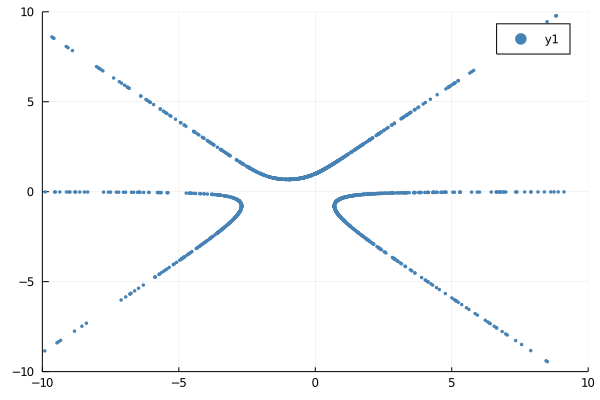

In [16]:
using Plots
points_as_matrix = hcat(points...)
scatter(points_as_matrix[1,:], points_as_matrix[2,:], 
        xlims = (-10,10), ylims = (-10,10), 
        markersize = 2,
        markercolor = :steelblue,
        markerstrokecolor = :steelblue)

<hr style="border:1px solid gray"> </hr>

# Parameter homotopies of composite systems

You can also track a parameter homotopies for composite system. If

$$ f = \begin{bmatrix} ab - q\\  ac - p\end{bmatrix}, \quad g =  \begin{bmatrix}x + y\\ y + 3\\ x + 2\end{bmatrix},$$

and you want to track solutions from random complex parameters to $(p,q) = (2, 3)$, this is how it works:

In [25]:
@var a b c x y 
@var p q
f = System([a * b - q, a * c - p], variables = [a;b;c], parameters = [p;q])
g = System([x + y, y + 3, x + 2], variables = [x;y])

parameters(f ∘ g)

2-element Array{Variable,1}:
 p
 q

In [29]:
complex_parameters = randn(ComplexF64, 2)
S_complex = solve(f ∘ g, 
            target_parameters = complex_parameters, 
            start_system = :total_degree) 

Result with 2 solutions
• 4 paths tracked
• 2 non-singular solutions (0 real)
• random_seed: 0x6498ba28
• start_system: :total_degree


Then, we track the solution in `S_complex` to the parameters $(2,3)$.

In [30]:
S = solve(f ∘ g, 
        solutions(S_complex), 
        start_parameters = complex_parameters, 
        target_parameters=[2, 3])

Tracking 2 paths... 100%|███████████████████████████████| Time: 0:00:04
  # paths tracked:                  2
  # non-singular solutions (real):  2 (2)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         2 (2)


Result with 2 solutions
• 2 paths tracked
• 2 non-singular solutions (2 real)
• random_seed: 0x3d3ebba1


It does not matter at which level the parameters are.